In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

vamos abrir el archivo que es xlsx 

In [2]:
file_name = "sequia2023.xlsx"

In [3]:
sheet_name = 0
df = pd.read_excel(file_name, sheet_name=sheet_name)

In [4]:
df.head()

,CVE_CONCATENADA,CVE_ENT,CVE_MUN,NOMBRE_MUN,ENTIDAD,ORG_CUENCA,CLV_OC,CON_CUENCA,CVE_CONC,2003-01-31 00:00:00,...,2023-08-15 00:00:00,2023-08-31 00:00:00,2023-09-15 00:00:00,2023-09-30 00:00:00,2023-10-15 00:00:00,2023-10-31 00:00:00,2023-11-15 00:00:00,2023-11-30 00:00:00,2023-12-15 00:00:00,2023-12-31 00:00:00
0,1001,1,1,Aguascalientes,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D1,D1
1,1002,1,2,Asientos,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D3,D3,D3,D3,D3,D3,D3,D2,D1,D1
2,1003,1,3,Calvillo,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D3,D3
3,1004,1,4,Cosío,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D2,D2,D3,D3,D3,D3,D3,D3,D2,D2
4,1005,1,5,Jesús María,Aguascalientes,Lerma Santiago Pacífico,VIII,Rio Santiago,16,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D2,D2


eliminaremos las columnas que no necesitamos, la mayoria son claves de identificacion, tambien eliminaremos las ciudades de cada estado, solo necesitamos saber el estado y los datos historicos de las sequias

In [5]:
df = df.drop(columns=["CVE_CONCATENADA","CVE_ENT","CVE_MUN","NOMBRE_MUN", "ORG_CUENCA", "CLV_OC","CVE_CONC","CON_CUENCA","CVE_CONC"])

In [6]:
df.head()

,ENTIDAD,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,...,2023-08-15 00:00:00,2023-08-31 00:00:00,2023-09-15 00:00:00,2023-09-30 00:00:00,2023-10-15 00:00:00,2023-10-31 00:00:00,2023-11-15 00:00:00,2023-11-30 00:00:00,2023-12-15 00:00:00,2023-12-31 00:00:00
0,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D1,D1
1,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D3,D3,D3,D3,D3,D3,D3,D2,D1,D1
2,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D3,D3
3,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D2,D2,D3,D3,D3,D3,D3,D3,D2,D2
4,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D3,D3,D3,D3,D3,D3,D3,D3,D2,D2


vamos a reemplazar los niveles de sequia por valores numericos y se van a reemplzar de la siguiente manera:
Minima (10% reduccion agua) D0 = 1
Moderada (15%) D1= 2
Moderada (25%) D2= 3
Severa (40%) D3= 4
Critica (>40%) D4= 5

In [7]:
df_replace = df.replace({'D0': 1,'D1':2,'D2':3,'D3':4,'D4':5})

vamos a reemplzar los valores nulos con 0, ya que sino se asigno un nivel de sequia es porque no hubo 

In [8]:
df_replace=df_replace.fillna(0)

In [9]:
df_replace.head()

,ENTIDAD,2003-01-31 00:00:00,2003-02-28 00:00:00,2003-03-31 00:00:00,2003-04-30 00:00:00,2003-05-31 00:00:00,2003-06-30 00:00:00,2003-07-31 00:00:00,2003-08-31 00:00:00,2003-09-30 00:00:00,...,2023-08-15 00:00:00,2023-08-31 00:00:00,2023-09-15 00:00:00,2023-09-30 00:00:00,2023-10-15 00:00:00,2023-10-31 00:00:00,2023-11-15 00:00:00,2023-11-30 00:00:00,2023-12-15 00:00:00,2023-12-31 00:00:00
0,Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,2.0
1,Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,2.0
2,Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
3,Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
4,Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0


en la columna entidad tenemos los estados repetidos ya que en la base de datos esta separado por ciudad, pero lo que queremos saber es el nivel de sequia por estado, por lo que vamos a tener en cuenta el peor escenario, lo que quiere decir que se tomara el valor maximo del conjunto de ciudades y ese sera el valor asignado al estado.

In [10]:
df_replace["ENTIDAD"].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Estado de México',
       'Michoacán de Ocampo', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro de Arteaga', 'Quintana Roo',
       'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas',
       'Tlaxcala', 'Veracruz de Ignacio de la Llave', 'Yucatán',
       'Zacatecas'], dtype=object)

In [11]:
max = df_replace.groupby('ENTIDAD').max()

new_df = pd.DataFrame(max)
print(new_df)

                                 2003-01-31  2003-02-28  2003-03-31  \
ENTIDAD                                                               
Aguascalientes                          0.0         0.0         0.0   
Baja California                         4.0         3.0         2.0   
Baja California Sur                     3.0         3.0         3.0   
Campeche                                1.0         2.0         2.0   
Chiapas                                 2.0         2.0         2.0   
Chihuahua                               4.0         4.0         4.0   
Ciudad de México                        1.0         1.0         1.0   
Coahuila de Zaragoza                    3.0         3.0         3.0   
Colima                                  0.0         0.0         0.0   
Durango                                 3.0         3.0         3.0   
Estado de México                        2.0         2.0         2.0   
Guanajuato                              0.0         0.0         0.0   
Guerre

In [12]:
new_df.head()

,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,...,2023-08-15,2023-08-31,2023-09-15,2023-09-30,2023-10-15,2023-10-31,2023-11-15,2023-11-30,2023-12-15,2023-12-31
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Baja California,4.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baja California Sur,3.0,3.0,3.0,3.0,3.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Campeche,1.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Chiapas,2.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


creamos un nuevo dataframe con los maximos y ahora los vamos intercambiar las columnas por filas, asi tenemos por cada columna cada estado

In [13]:
df_trans = new_df.T 
df_trans.head()

ENTIDAD,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
2003-01-31 00:00:00,0.0,4.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,0.0,0.0
2003-02-28 00:00:00,0.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,1.0,0.0
2003-03-31 00:00:00,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,0.0
2003-04-30 00:00:00,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0
2003-05-31 00:00:00,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0


In [14]:
df_new = df_trans.reset_index()

In [15]:
df_new.head()

ENTIDAD,index,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,2003-01-31,0.0,4.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,0.0,0.0
1,2003-02-28,0.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,1.0,0.0
2,2003-03-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,0.0
3,2003-04-30,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0
4,2003-05-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0


In [16]:
df_new.columns.values[0] = 'DATE'

In [17]:
df_new.columns

Index(['DATE', 'Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Estado de México',
       'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro de Arteaga', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype='object', name='ENTIDAD')

In [18]:
df_new.head()

ENTIDAD,DATE,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
0,2003-01-31,0.0,4.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,0.0,0.0
1,2003-02-28,0.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,1.0,0.0
2,2003-03-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,0.0
3,2003-04-30,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0
4,2003-05-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0


In [19]:
pp=df_new.iloc[:, 0]
print(pp)

0     2003-01-31
1     2003-02-28
2     2003-03-31
3     2003-04-30
4     2003-05-31
         ...    
365   2023-10-31
366   2023-11-15
367   2023-11-30
368   2023-12-15
369   2023-12-31
Name: DATE, Length: 370, dtype: datetime64[ns]


In [35]:
df_new['Quintana Roo'].unique()

array([0., 1., 2., 3., 4.])

In [21]:
df_new2=df_new.set_index(["index"])
df_new2.head()

ENTIDAD,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz de Ignacio de la Llave,Yucatán,Zacatecas
index,,,,,,,,,,,,,,,,,,,,,
2003-01-31,0.0,4.0,3.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,0.0,0.0
2003-02-28,0.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,2.0,1.0,2.0,1.0,0.0
2003-03-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,0.0
2003-04-30,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0
2003-05-31,0.0,2.0,3.0,2.0,2.0,4.0,1.0,3.0,0.0,3.0,...,0.0,1.0,5.0,5.0,2.0,1.0,1.0,2.0,0.0,1.0


In [37]:
df_new2.shape

(370, 32)

In [42]:
df_new2 = df_new2.astype(int)

In [43]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370 entries, 2003-01-31 to 2023-12-31
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Aguascalientes                   370 non-null    int32
 1   Baja California                  370 non-null    int32
 2   Baja California Sur              370 non-null    int32
 3   Campeche                         370 non-null    int32
 4   Chiapas                          370 non-null    int32
 5   Chihuahua                        370 non-null    int32
 6   Ciudad de México                 370 non-null    int32
 7   Coahuila de Zaragoza             370 non-null    int32
 8   Colima                           370 non-null    int32
 9   Durango                          370 non-null    int32
 10  Estado de México                 370 non-null    int32
 11  Guanajuato                       370 non-null    int32
 12  Guerrero                       

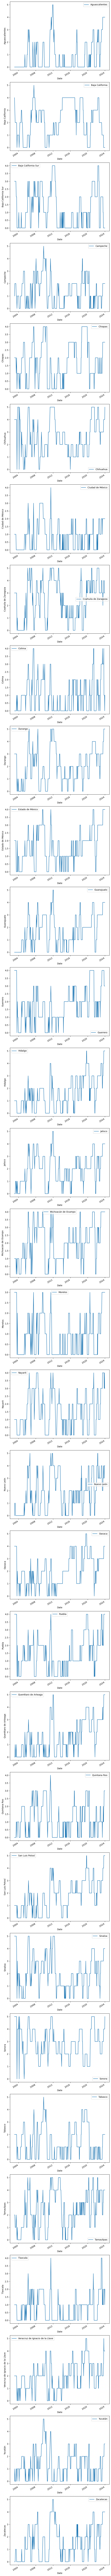

In [44]:
fig, axes = plt.subplots(nrows=len(df_new2.columns), ncols=1, figsize=(7, 5*len(df_new2.columns)))

# Iterar sobre las columnas y trazar cada una en su propia subgráfica
for i, col in enumerate(df_new2.columns):
    df_new2[col].plot(ax=axes[i], legend=True)
    axes[i].set_ylabel(col)  # Establecer la etiqueta del eje y como el nombre de la columna
    axes[i].set_xlabel('Date')  # Establecer la etiqueta del eje x
    
# Ajustar la disposición de las subgráficas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

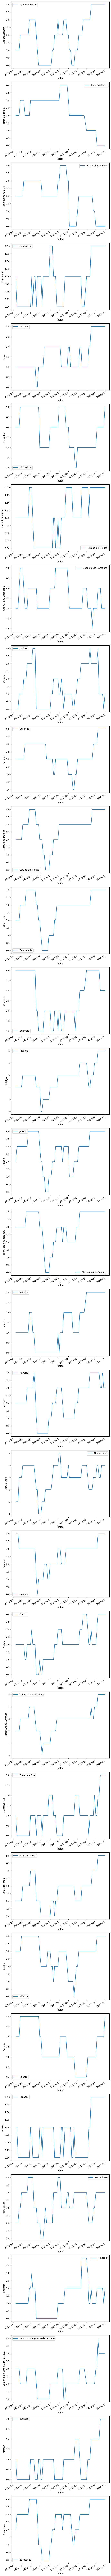

In [45]:
ultimas_20_filas = df_new2.tail(78)

# Configurar el tamaño y la disposición de las subgráficas
fig, axes = plt.subplots(nrows=len(df_new2.columns), ncols=1, figsize=(7, 5*len(df_new2.columns)))

# Iterar sobre las columnas y trazar las últimas 20 filas de cada una
for i, col in enumerate(df_new2.columns):
    ultimas_20_filas[col].plot(ax=axes[i], legend=True)
    axes[i].set_ylabel(col)  # Establecer la etiqueta del eje y como el nombre de la columna
    axes[i].set_xlabel('Índice')  # Establecer la etiqueta del eje x

# Ajustar la disposición de las subgráficas
plt.tight_layout()

# Mostrar el gráfico
plt.show()